# 1. Prototype based clustering with K-means

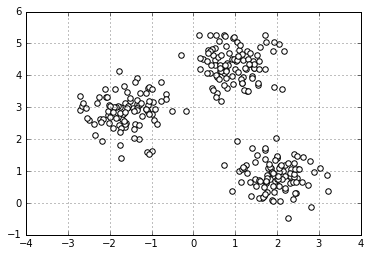

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, shuffle = True, random_state=0, cluster_std =0.5)
plt.scatter(X[:,0], X[:,1], c='white', marker ='o', s=30)
plt.grid()
plt.show()

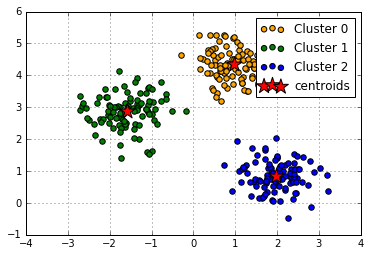

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init='random', n_init = 10, max_iter = 300, tol = 1e-4, random_state=0)
y_km = km.fit_predict(X)

labels = [0,1,2]
colrs = ['orange','green','blue']

for label, colr in zip(labels, colrs):
    plt.scatter(X[y_km == label, 0], X[y_km==label, 1], c=colr,s=30, label = 'Cluster '+ str(label))

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250, marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()


### 1.1 Find the optimal number of clusters

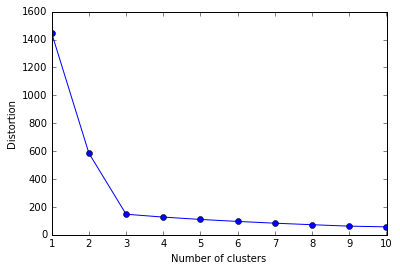

In [19]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init='random', n_init = 10, max_iter = 300, tol = 1e-4, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


'''
Conveniently, we don't need to compute the within-cluster SSE explicitly as it is already accessible via
the inertia_ attribute after fitting a KMeans model:
'''

# the following plot shows, k =3 indeed is a good number of clusters.


### 1.2 Evaluate the clustering quality

In [22]:
import numpy as np
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)
print('k = 3:', silhouette_avg) 

km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)
print('k = 2:', silhouette_avg) 

k = 3: 0.716534980259
k = 2: 0.587624287476


# 2. Hierarchical clustering - single or complete linkage

In [24]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [27]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters =2, affinity = 'euclidean', linkage = 'complete' )
labels = ac.fit_predict(df) # here the input could be X or df.

'''
Looking at the predicted cluster labels, we can see that the first, fourth, 
and fifth sample (ID_0, ID_3, and ID_4) were assigned to one cluster (0), 
and the samples ID_1 and ID_2 were assigned to a second cluster (1), 
which is consistent with the results that we can observe in the dendrogram.
'''
labels

array([0, 1, 1, 0, 0])

# 3. Density-based spatial clustering

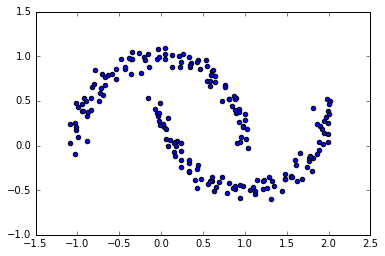

In [34]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise =0.06, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

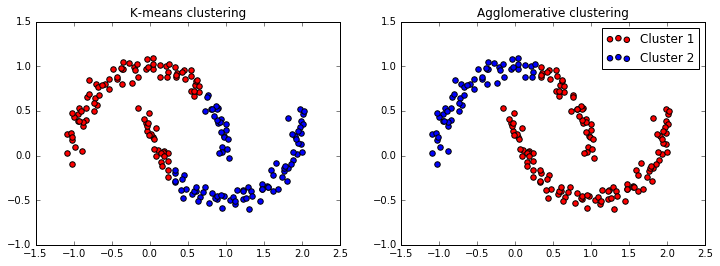

In [47]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km==0, 1], c='red',s=30, label = 'Cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km==1, 1], c='blue',s=30, label = 'Cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac ==0, 1], c='red',s=30, label = 'Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac ==1, 1], c='blue',s=30, label = 'Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.show()

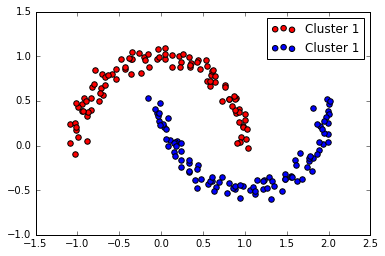

In [44]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps =0.2, metric='euclidean', min_samples =5)
y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db ==0, 1], c='red',s=30, label = 'Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db ==1, 1], c='blue',s=30, label = 'Cluster 1')
plt.legend()
plt.show()
